In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import combinations

In [2]:
data_path = Path('./data/transform/')
driver_df = pd.read_csv(data_path / 'driver.csv', sep='|')
car_df = pd.read_csv(data_path / 'car.csv', sep='|')

## Driver and Car Combos

Pick 5 + 1

If the purpose of the game was to pick a lineup and keep it, this analysis would show the optimal lineups so far, maximizing average points within a budget constraint.

In [3]:
driver_df['Current Price'].sum()

278.9

In [4]:
min_car_price = car_df['Current Price'].min()
max_car_price = car_df['Current Price'].max()

### All driver combos within budget range

In [5]:
combos = []
total_budget = 103


for i, index in enumerate(list(combinations(driver_df.index, 5))):
    cost = driver_df.loc[index, ['Current Price']].sum()[0]
    if cost < total_budget - min_car_price and cost > total_budget - max_car_price:
        combos.append(pd.DataFrame(driver_df.loc[index, ['last_name', 'diff_price', 'Current Price', 'avg']].sum()).T)
        
        

In [6]:
combo_df = pd.concat(combos).sort_values(by='avg', ascending=False)
combo_df[:200]

,last_name,diff_price,Current Price,avg
0,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714
0,VerstappenPerezLeclercBottasNorris,34.996334,93.0,141.285714
0,RussellPerezLeclercSainzBottas,39.231555,87.6,140.0
0,VerstappenPerezLeclercOconBottas,36.843295,89.6,139.571429
0,RussellPerezLeclercSainzNorris,31.637355,93.9,138.571429
...,...,...,...,...
0,VerstappenPerezSainzStrollNorris,17.724501,90.6,119.571429
0,HamiltonPerezLeclercSainzStroll,14.924501,93.4,119.571429
0,VerstappenPerezLeclercStrollZhou,23.195081,85.0,119.428571
0,VerstappenPerezLeclercGaslyVettel,16.195081,92.0,119.428571


## Driver Combos + Car

In [7]:
all_combo = combo_df.merge(car_df, how='cross', suffixes=['', '_car'])

In [8]:
all_combo

,last_name,diff_price,Current Price,avg,Unnamed: 0_x,Team,BAH,SAU,AUS,ITA,...,avg_car,max,median,pts_price,pts_price_med,Unnamed: 0_y,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car
0,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,0,Mercedes,57,34,64,31,...,45.285714,64,42.0,29.614004,27.465354,0,33.7,34.5,1.34,-4.085996
1,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,1,Red Bull,4,62,39,99,...,62.285714,99,69.0,40.730934,45.121654,1,32.6,32.5,1.91,8.130934
2,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,2,Alpine,24,13,10,8,...,17.428571,33,15.0,11.397188,9.809055,4,13.9,14.0,1.25,-2.502812
3,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,3,Ferrari,76,63,44,30,...,50.000000,76,51.0,32.696850,33.350787,2,25.7,25.0,1.95,6.996850
4,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,4,AlphaTauri,10,3,8,36,...,10.571429,36,8.0,6.913048,5.231496,6,10.0,10.5,1.06,-3.086952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70525,HamiltonAlonsoZhouSchumacherRicciardo,-37.756752,70.5,36.142857,5,Aston Martin,14,19,3,32,...,14.857143,32,15.0,9.715636,9.809055,5,10.9,11.5,1.36,-1.184364
70526,HamiltonAlonsoZhouSchumacherRicciardo,-37.756752,70.5,36.142857,6,Alfa Romeo,31,3,24,35,...,18.142857,35,21.0,11.864286,13.732677,7,8.8,8.0,2.06,3.064286
70527,HamiltonAlonsoZhouSchumacherRicciardo,-37.756752,70.5,36.142857,7,Williams,15,-1,8,17,...,11.428571,26,14.0,7.473566,9.155118,8,6.5,7.0,1.76,0.973566
70528,HamiltonAlonsoZhouSchumacherRicciardo,-37.756752,70.5,36.142857,8,Haas,27,1,13,8,...,4.571429,27,5.0,2.989426,3.269685,9,6.4,6.0,0.71,-3.410574


In [9]:
all_combo['total_diff_price'] = all_combo['diff_price'] + all_combo['diff_price_car']
all_combo['total_price'] = all_combo['Current Price'] + all_combo['Current Price_car']
all_combo['total_avg'] = all_combo['avg'] + all_combo['avg_car']

## Combos Filtered for Budget

In [10]:
all_combo_b = all_combo[all_combo['total_price'] < total_budget].sort_values(by='total_avg', ascending=False).reset_index()

In [11]:
all_combo_b.head(50)[['last_name', 'Team', 'total_avg', 'total_diff_price', 'total_price']]

,last_name,Team,total_avg,total_diff_price,total_price
0,PerezLeclercSainzBottasMagnussen,Red Bull,180.142857,44.902395,102.6
1,RussellPerezLeclercBottasMagnussen,Ferrari,177.0,45.551189,102.2
2,RussellPerezLeclercBottasLatifi,Ferrari,176.571429,44.662929,102.7
3,PerezLeclercSainzOconBottas,Ferrari,176.142857,44.974669,102.0
4,PerezLeclercOconBottasNorris,Ferrari,173.142857,43.65685,100.6
5,PerezLeclercSainzBottasSchumacher,Red Bull,172.428571,37.813718,102.7
6,PerezLeclercSainzStrollMagnussen,Red Bull,172.0,38.125458,102.0
7,PerezLeclercSainzStrollLatifi,Red Bull,171.571429,37.237198,102.5
8,PerezLeclercSainzBottasStroll,Ferrari,171.142857,43.944971,98.5
9,RussellPerezOconBottasMagnussen,Red Bull,171.0,36.719518,102.5


## 5 Driver Combos

<AxesSubplot:>

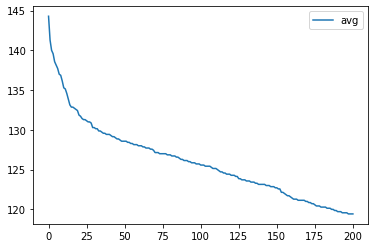

In [12]:
combo_df.sort_values(by='avg', ascending=False).reset_index().loc[0:200, ['avg']].plot()

## Five Driver + Car Combos

<AxesSubplot:>

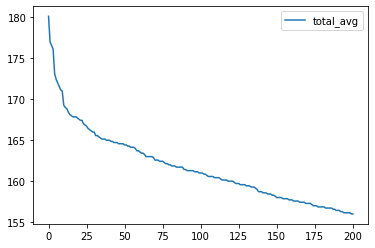

In [13]:
all_combo_b.sort_values(by='total_avg', ascending=False).reset_index().loc[0:200, ['total_avg']].plot()

In [16]:
all_combo_b.sort_values(by='total_avg', ascending=False).head(50)

,index,last_name,diff_price,Current Price,avg,Unnamed: 0_x,Team,BAH,SAU,AUS,...,pts_price,pts_price_med,Unnamed: 0_y,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car,total_diff_price,total_price,total_avg
0,2411,PerezLeclercSainzBottasMagnussen,36.771462,70.0,117.857143,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,44.902395,102.6,180.142857
1,773,RussellPerezLeclercBottasMagnussen,38.554339,76.5,127.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,45.551189,102.2,177.0
2,853,RussellPerezLeclercBottasLatifi,37.666079,77.0,126.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,44.662929,102.7,176.571429
3,903,PerezLeclercSainzOconBottas,37.977819,76.3,126.142857,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,44.974669,102.0,176.142857
4,1393,PerezLeclercOconBottasNorris,36.66,74.9,123.142857,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,43.65685,100.6,173.142857
5,6961,PerezLeclercSainzBottasSchumacher,29.682784,70.1,110.142857,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,37.813718,102.7,172.428571
6,7221,PerezLeclercSainzStrollMagnussen,29.994524,69.4,109.714286,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,38.125458,102.0,172.0
7,7521,PerezLeclercSainzStrollLatifi,29.106265,69.9,109.285714,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,37.237198,102.5,171.571429
8,1663,PerezLeclercSainzBottasStroll,36.948121,72.8,121.142857,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,43.944971,98.5,171.142857
9,7891,RussellPerezOconBottasMagnussen,28.588585,69.9,108.714286,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,36.719518,102.5,171.0


In [14]:
all_combo_b[all_combo_b['last_name'].str.contains('Verstappen')].head(50)

,index,last_name,diff_price,Current Price,avg,Unnamed: 0_x,Team,BAH,SAU,AUS,...,pts_price,pts_price_med,Unnamed: 0_y,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car,total_diff_price,total_price,total_avg
65,5053,VerstappenPerezOconBottasMagnussen,25.671183,76.7,113.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,32.668034,102.4,163.0
71,5423,VerstappenPerezOconBottasLatifi,24.782923,77.2,112.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,31.779774,102.9,162.571429
107,6713,VerstappenLeclercBottasStrollMagnussen,26.171044,74.0,110.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,33.167894,99.7,160.571429
108,6703,VerstappenLeclercBottasStrollAlbon,24.371044,75.8,110.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,31.367894,101.5,160.571429
117,7013,VerstappenLeclercBottasStrollLatifi,25.282784,74.5,110.142857,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,32.279635,100.2,160.142857
131,7453,VerstappenLeclercTsunodaBottasStroll,22.935684,76.2,109.428571,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,29.932535,101.9,159.428571
132,16,VerstappenPerezLeclercBottasNorris,34.996334,93.0,141.285714,6,Alfa Romeo,31,3,24,...,11.864286,13.732677,7,8.8,8.0,2.06,3.064286,38.06062,101.8,159.428571
146,22541,VerstappenPerezStrollLatifiMagnussen,16.799629,70.3,96.142857,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,24.930562,102.9,158.428571
150,8203,VerstappenPerezBottasStrollAlbon,22.841485,75.0,108.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,29.838335,100.7,158.0
152,8213,VerstappenPerezBottasStrollMagnussen,24.641485,73.2,108.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,31.638335,98.9,158.0
